# MOVIE RATING PREDICTION WITH PYTHON

##### submitted by TELS MARIYA THOMAS as part of Internship at COdSoft 

https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

MOVIE RATING PREDICTION WITH PYTHON
Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [1]:
# import the libraries
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load  and read the data

In [2]:
# load the data
data=pd.read_csv(r"IMDb Movies India.csv", encoding='latin1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# from the info there aew 15509 entries with 10 columns 
# except the target column all other columns are object type. 

In [4]:
# get the description of the data 
data.describe(include=object)

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


from the description it is clear that there are duplicates in the data\
Most of the films are from 2019\
number of movies with duration of 120 min is high\
movies from Daram category is high in number \
Jyant Desai is appears 38 times in the director column\
Ashok kumar is the top actor 1 in the given films\
Rekha is the top actor 2 in the given films\
Pran is the top actor 3 in the given films

### duplicates in the data 

In [4]:
data.duplicated().sum()

6

In [5]:
df=data.drop_duplicates()

### Checking for null values 

In [6]:
((df.isnull().sum()/df.shape[0])*100)[((df.isnull().sum()/df.shape[0])*100)!=0]

Year         3.399342
Duration    53.305812
Genre       12.100884
Rating      48.919564
Votes       48.913114
Director     3.379991
Actor 1     10.417339
Actor 2     15.358318
Actor 3     20.254144
dtype: float64

In [27]:
# all the columns except name column has missing values. 

# Cleaning the Data

In [8]:
for i in df.columns:
    print(i,df[i].unique())

Name [' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']
Year [nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' '(1932)' '(1923)' '(1915)' '(1928)'
 '(1922)' '(19

#### name

In [7]:
# remove # from the movie name
df['Name']=df['Name'].str.strip('#')

#### year 

In [8]:
# year has brackets. remove them. 
df['Year']=df['Year'].str.strip("(")

In [9]:
# year has brackets. remove them. 
df['Year']=df['Year'].str.strip(")")

In [10]:
# convert year into datetime format and save as year
df['Year']=pd.to_datetime(df['Year']).dt.year

#### duration

In [11]:
# duration has min in it. remove it. 
df['Duration']=df['Duration'].str.strip("min").astype(float)

#### Genre

In [12]:
# expand the genre column 
df[['Genre1','Genre2','Genre3']]=df['Genre'].str.split(expand=True)

In [13]:
# drop the genre
df.drop('Genre', axis=1, inplace=True)

In [14]:
# strip the , from genre1 column 
df['Genre1']=df['Genre1'].str.strip(',')

In [15]:
# strip the , from genre2 column 
df['Genre2']=df['Genre2'].str.strip(',')

### Votes

In [16]:
# get unique values of votes 
df['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [17]:
#replace , with ""
df['Votes']=df['Votes'].str.replace(pat=",", repl="")

In [18]:
#strip $ ans M from the votes column 
df['Votes']=df['Votes'].str.strip("$")

In [19]:
df['Votes']=df['Votes'].str.strip("M")

In [20]:
# change the datatypeof the column to float
df['Votes']=df['Votes'].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15503 entries, 0 to 15508
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15503 non-null  object 
 1   Year      14976 non-null  float64
 2   Duration  7239 non-null   float64
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   float64
 5   Director  14979 non-null  object 
 6   Actor 1   13888 non-null  object 
 7   Actor 2   13122 non-null  object 
 8   Actor 3   12363 non-null  object 
 9   Genre1    13627 non-null  object 
 10  Genre2    6201 non-null   object 
 11  Genre3    3240 non-null   object 
dtypes: float64(4), object(8)
memory usage: 1.5+ MB


### missing values

In [22]:
(df.isnull().sum()/df.shape[0])*100

Name         0.000000
Year         3.399342
Duration    53.305812
Rating      48.919564
Votes       48.913114
Director     3.379991
Actor 1     10.417339
Actor 2     15.358318
Actor 3     20.254144
Genre1      12.100884
Genre2      60.001290
Genre3      79.100819
dtype: float64

In [23]:
# dropping null values in the target column
df1=df.dropna(subset='Rating')

In [24]:
(df1.isnull().sum()/df1.shape[0])*100

Name         0.000000
Year         0.000000
Duration    26.114408
Rating       0.000000
Votes        0.000000
Director     0.063139
Actor 1      1.578482
Actor 2      2.525571
Actor 3      3.687334
Genre1       1.288041
Genre2      35.522162
Genre3      64.490466
dtype: float64

In [25]:
# drop genre 3 
df1.drop('Genre3', axis=1,inplace=True)

In [26]:
df1['Duration']=df1['Duration'].fillna(df1['Duration'].median())

In [27]:
df1['Director'].mode()

0    Mahesh Bhatt
Name: Director, dtype: object

In [28]:
df1['Director']=df1['Director'].fillna('Mahesh Bhatt')

In [29]:
df1['Actor 1'].mode()

0    Jeetendra
Name: Actor 1, dtype: object

In [30]:
df1['Actor 1']=df1['Actor 1'].fillna('Jeetendra')

In [31]:
df1['Actor 2'].mode()

0    Rekha
Name: Actor 2, dtype: object

In [32]:
df1['Actor 2']=df1['Actor 2'].fillna('Rekha')

In [33]:
df1['Actor 3'].mode()

0    Pran
Name: Actor 3, dtype: object

In [34]:
df1['Actor 3']=df1['Actor 3'].fillna('Pran')

In [35]:
df1['Genre1'].mode()

0    Drama
Name: Genre1, dtype: object

In [36]:
df1['Genre1']=df1['Genre1'].fillna('Drama')

In [37]:
df1[df1['Genre2'].isnull()]

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2
1,Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None
10,1:1.6 An Ode to Lost Love,2004.0,96.0,6.2,17.0,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,Drama,None
11,1:13:7 Ek Tera Saath,2016.0,120.0,5.9,59.0,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,Horror,None
30,15 Park Avenue,2005.0,116.0,7.1,1002.0,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose,Drama,None
32,15th August,1993.0,168.0,5.6,15.0,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...
15482,Zindagi Zindabad,2000.0,140.0,5.7,7.0,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji,Drama,None
15488,Zoo,2018.0,100.0,5.7,78.0,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta,Drama,None
15491,Zordaar,1996.0,134.0,4.7,29.0,Ajay Kashyap,Mahesh Anand,Vikas Anand,Bob Christo,Action,None
15493,Zubaan,2015.0,115.0,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama,None


In [38]:
df1['Genre2']=df1['Genre2'].fillna('Not available')

In [39]:
(df1.isnull().sum()/df1.shape[0])*100

Name        0.0
Year        0.0
Duration    0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
Genre1      0.0
Genre2      0.0
dtype: float64

In [88]:
# no more missing values exist in the data 

In [40]:
# we can also drop the name column as it wont help in further analysis
df2=df1.drop('Name',axis=1)

## Visualization of the cleaned Data

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7919 non-null   float64
 1   Duration  7919 non-null   float64
 2   Rating    7919 non-null   float64
 3   Votes     7919 non-null   float64
 4   Director  7919 non-null   object 
 5   Actor 1   7919 non-null   object 
 6   Actor 2   7919 non-null   object 
 7   Actor 3   7919 non-null   object 
 8   Genre1    7919 non-null   object 
 9   Genre2    7919 non-null   object 
dtypes: float64(4), object(6)
memory usage: 680.5+ KB


## univariate analysis

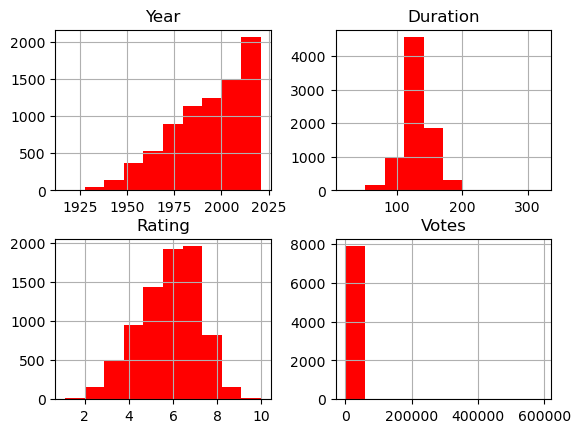

In [42]:
df2.hist(color='red')
plt.show()

In [43]:
df_cat=df2.select_dtypes(include=object)
df_num=df2.select_dtypes(exclude=object)

In [46]:
df_cat.columns

Index(['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre1', 'Genre2'], dtype='object')

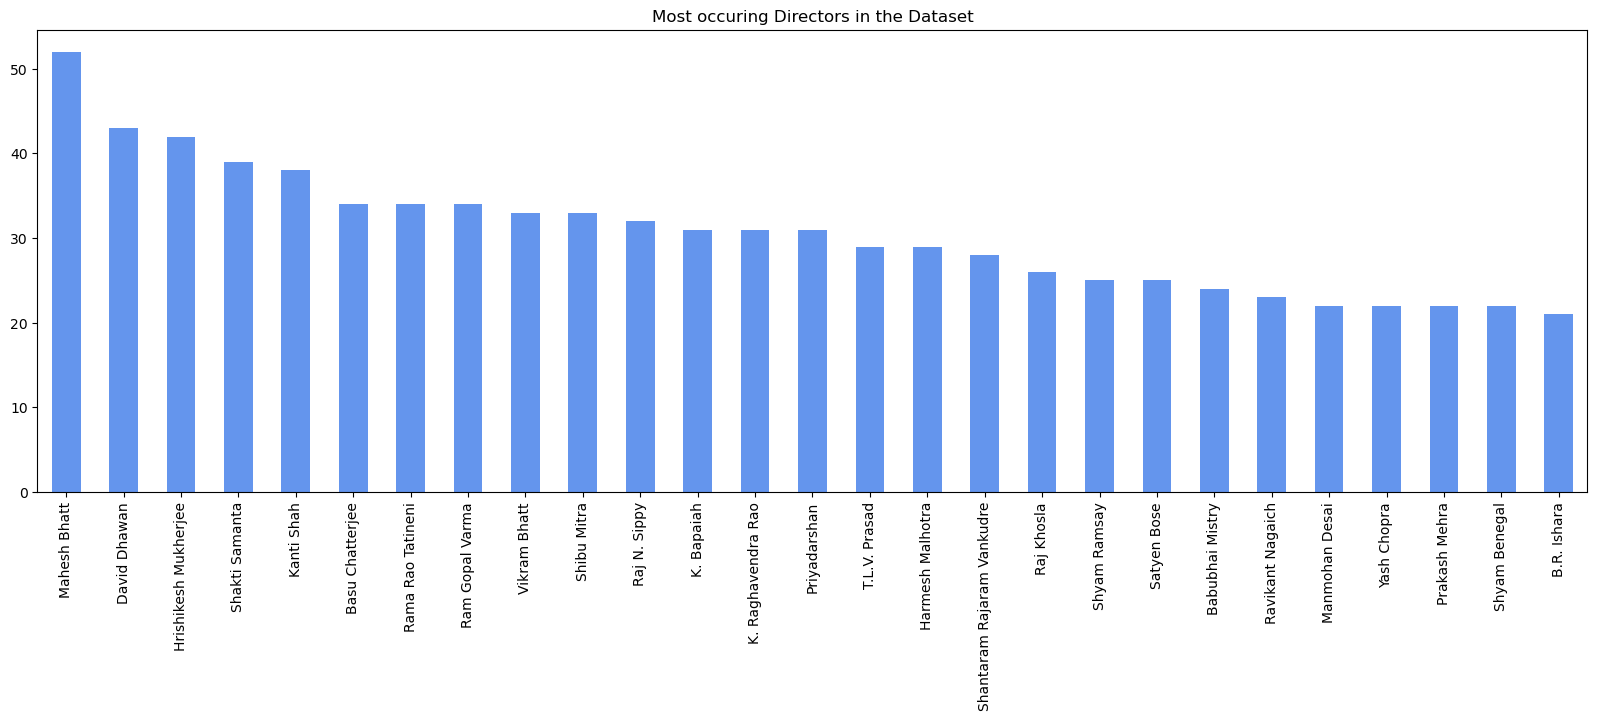

In [136]:
plt.figure(figsize=(20,6))
df_cat['Director'].value_counts()[df_cat['Director'].value_counts()>20].plot(kind='bar', color='cornflowerblue')
plt.title('Most occuring Directors in the Dataset')
plt.show()

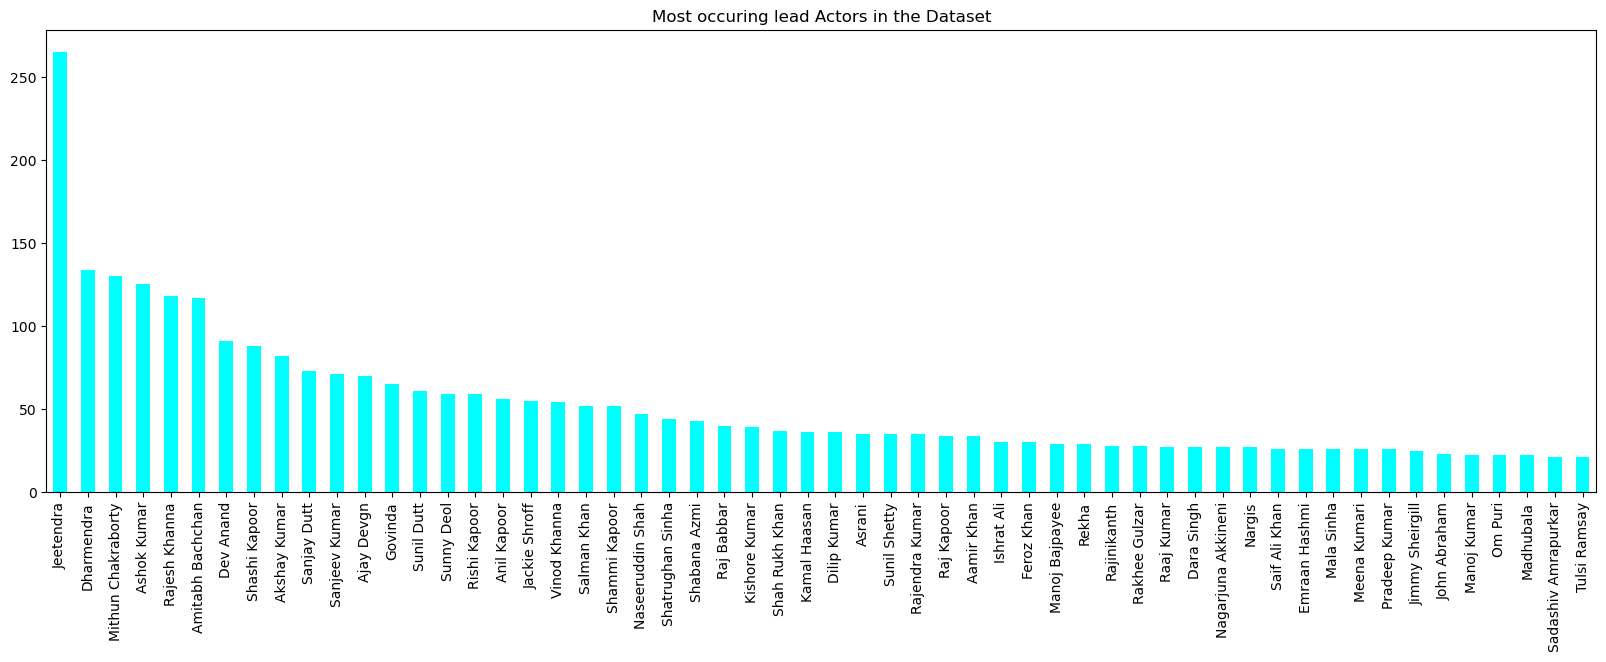

In [130]:
plt.figure(figsize=(20,6))
df_cat['Actor 1'].value_counts()[df_cat['Actor 1'].value_counts()>20].plot(kind='bar', color='aqua')
plt.title('Most occuring lead Actors in the Dataset')
plt.show()

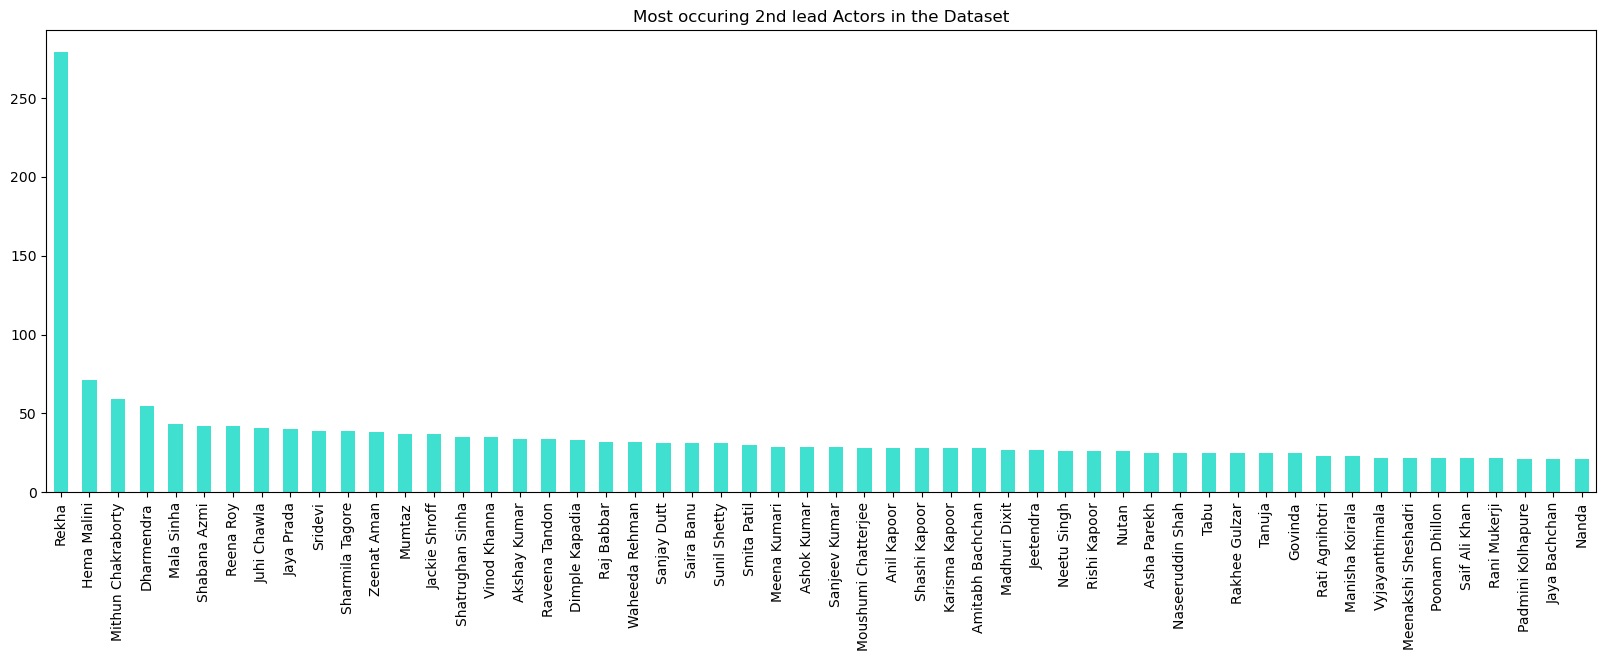

In [131]:
plt.figure(figsize=(20,6))
df_cat['Actor 2'].value_counts()[df_cat['Actor 2'].value_counts()>20].plot(kind='bar', color='turquoise')
plt.title('Most occuring 2nd lead Actors in the Dataset')
plt.show()


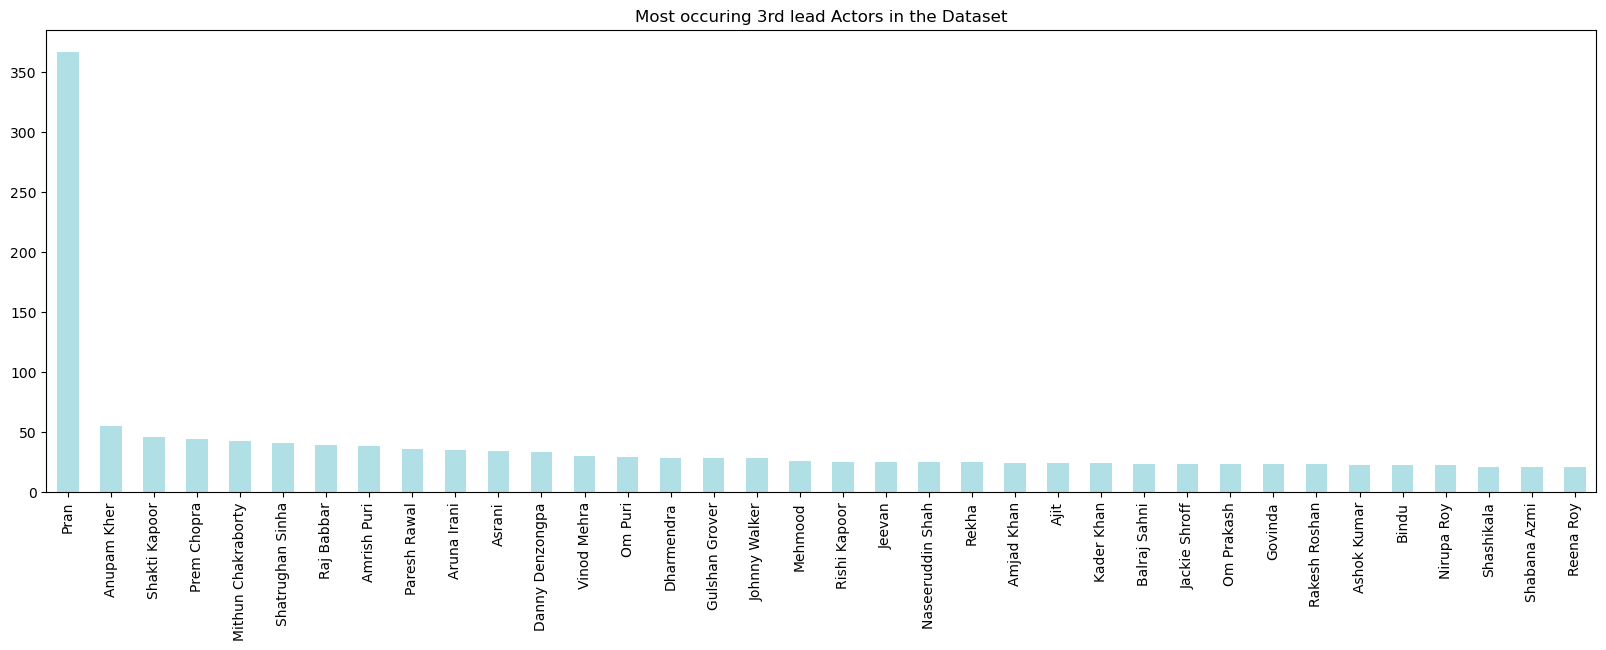

In [132]:
plt.figure(figsize=(20,6))
df_cat['Actor 3'].value_counts()[df_cat['Actor 3'].value_counts()>20].plot(kind='bar', color='powderblue')
plt.title('Most occuring 3rd lead Actors in the Dataset')
plt.show()

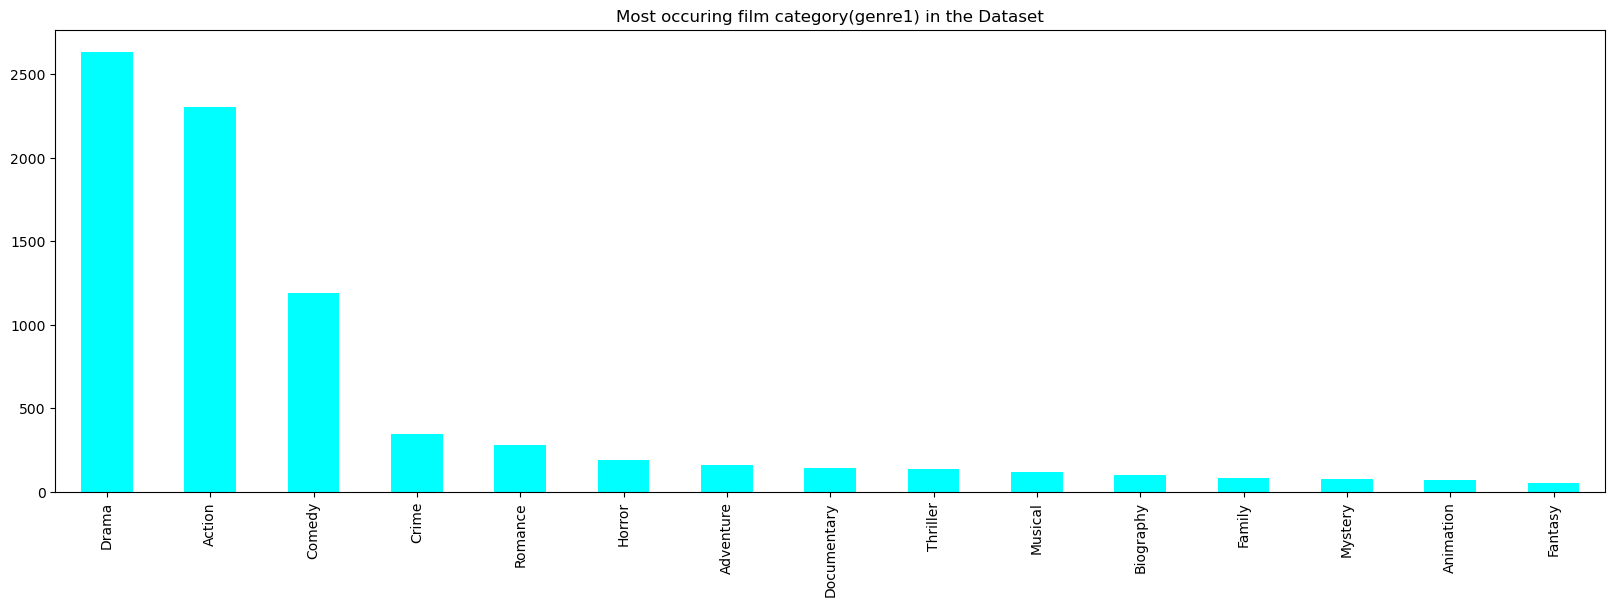

In [133]:
plt.figure(figsize=(20,6))
df_cat['Genre1'].value_counts()[df_cat['Genre1'].value_counts()>20].plot(kind='bar', color='cyan')
plt.title('Most occuring film category(genre1) in the Dataset')
plt.show()

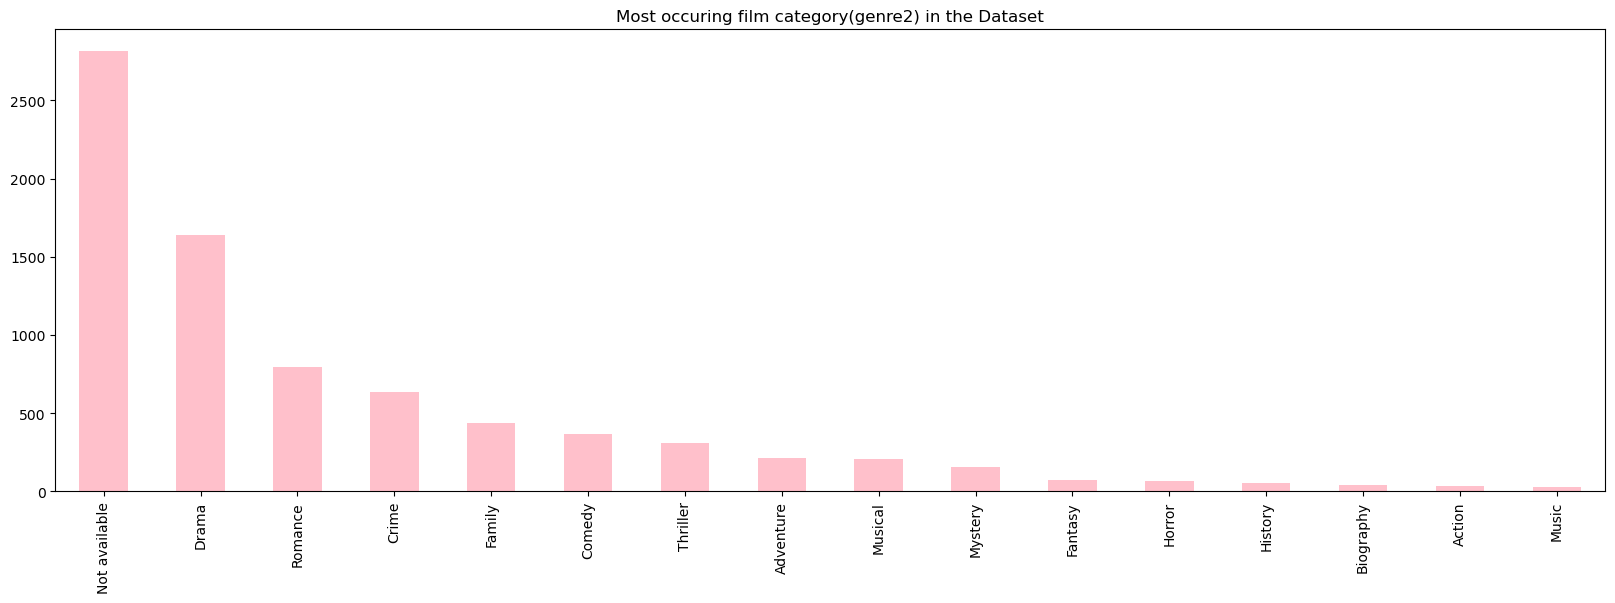

In [134]:
plt.figure(figsize=(20,6))
df_cat['Genre2'].value_counts()[df_cat['Genre2'].value_counts()>20].plot(kind='bar', color='pink')
plt.title('Most occuring film category(genre2) in the Dataset')
plt.show()

## Bivariate Analysis

In [56]:
df2.columns

Index(['Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3', 'Genre1', 'Genre2'],
      dtype='object')

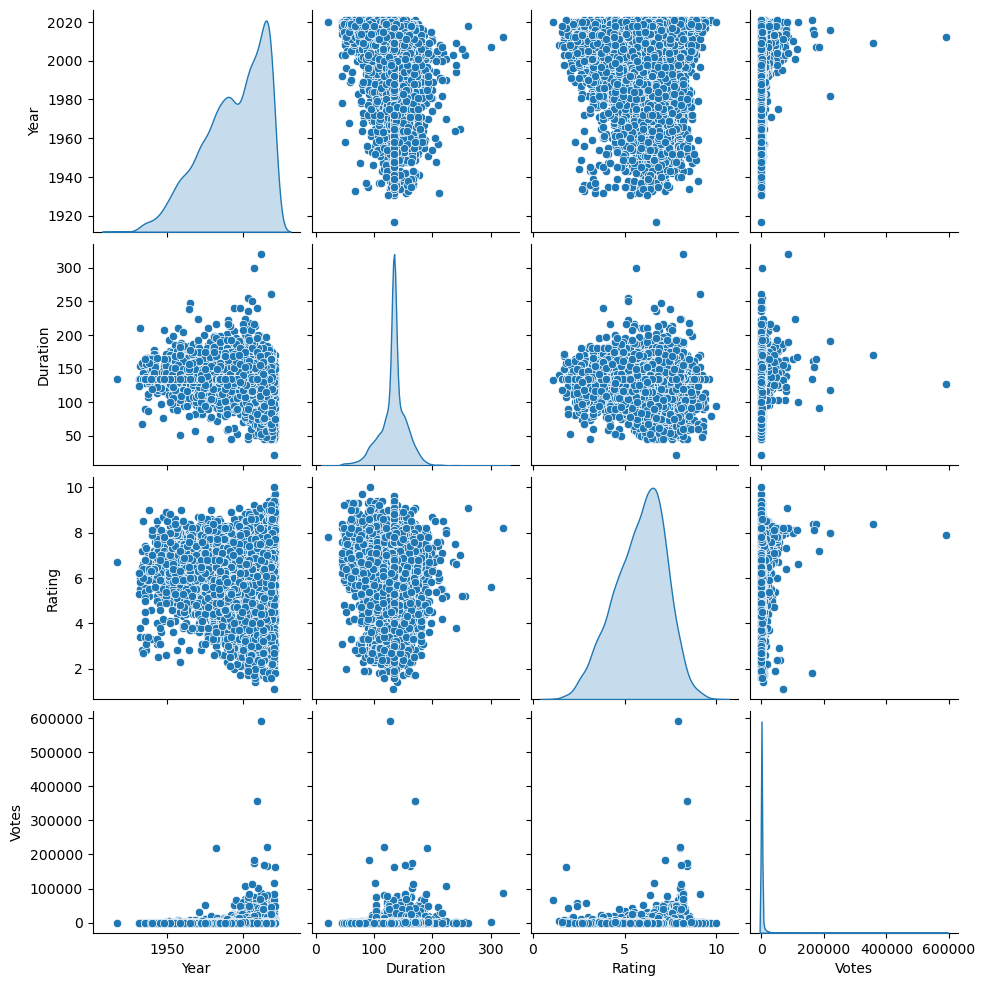

In [68]:
sns.pairplot(df2, diag_kind='kde')
plt.show()

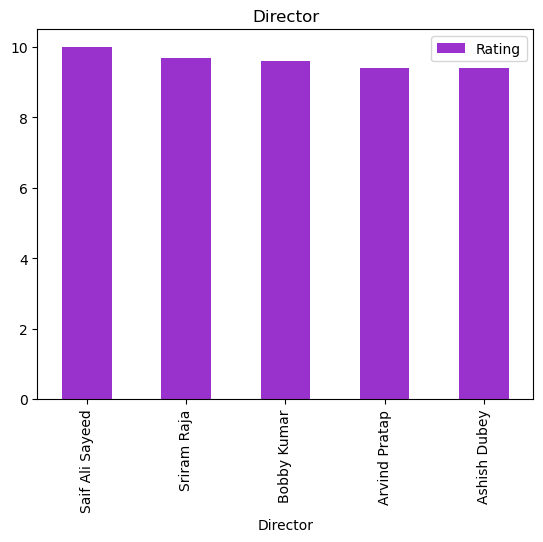

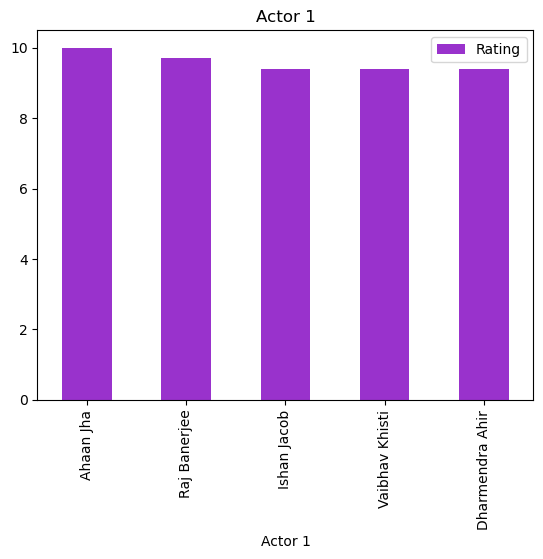

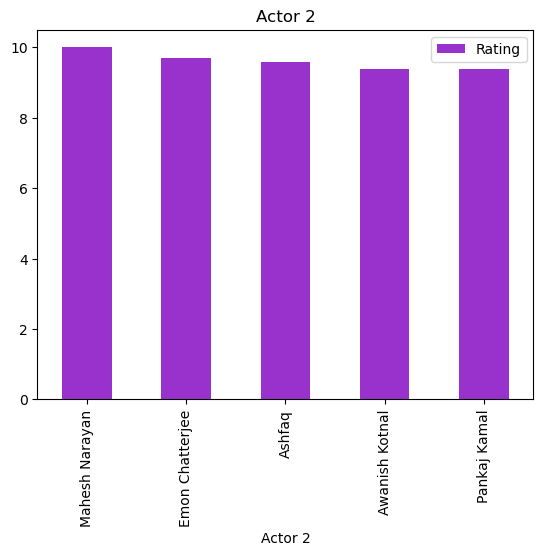

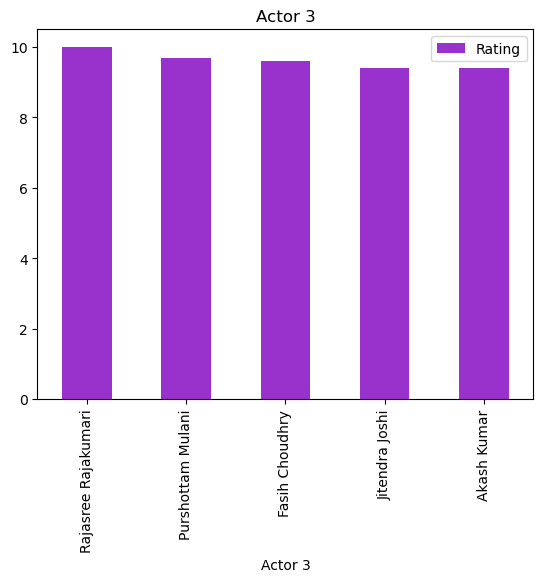

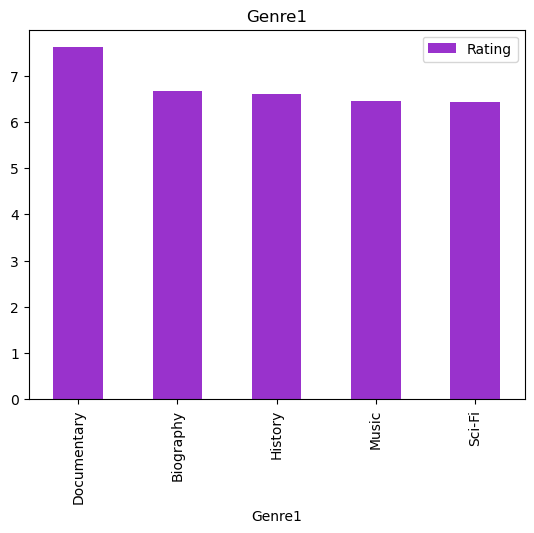

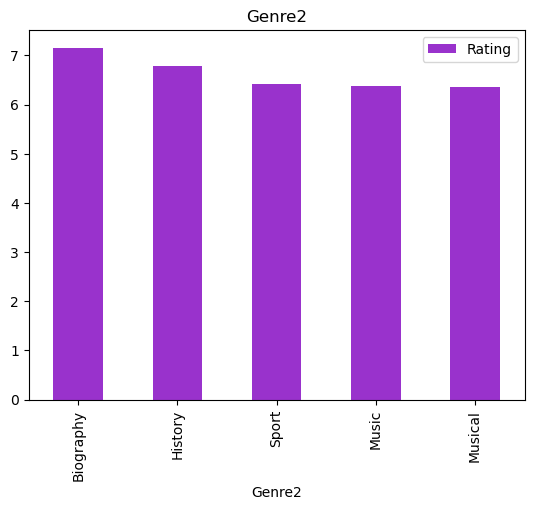

In [137]:

for i in df_cat.columns:
    df2.groupby(i)[['Rating']].mean().sort_values(by='Rating', ascending=False).head().plot(kind='bar', color='darkorchid')
    plt.title(i)

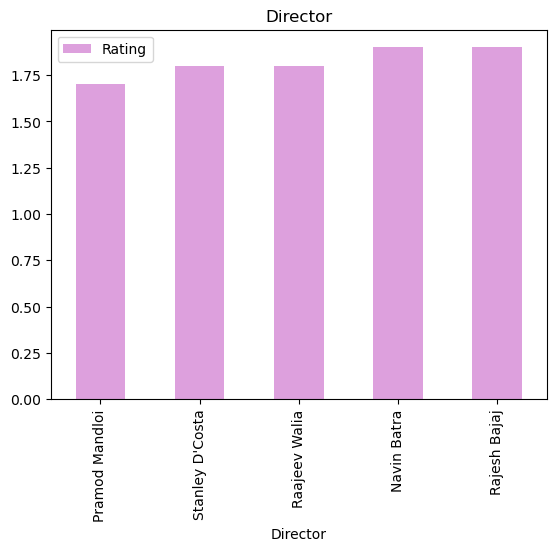

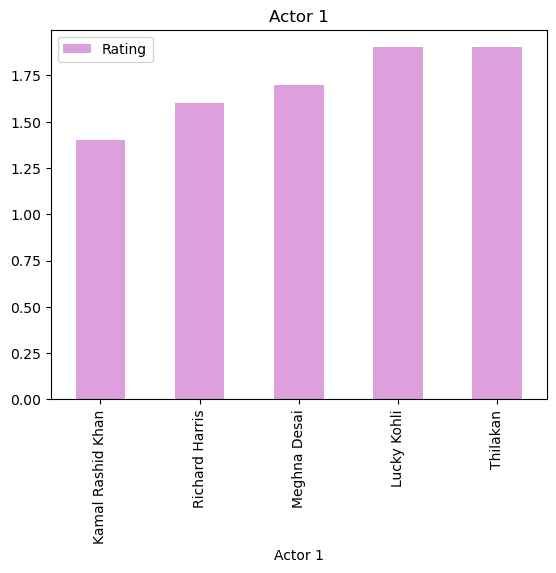

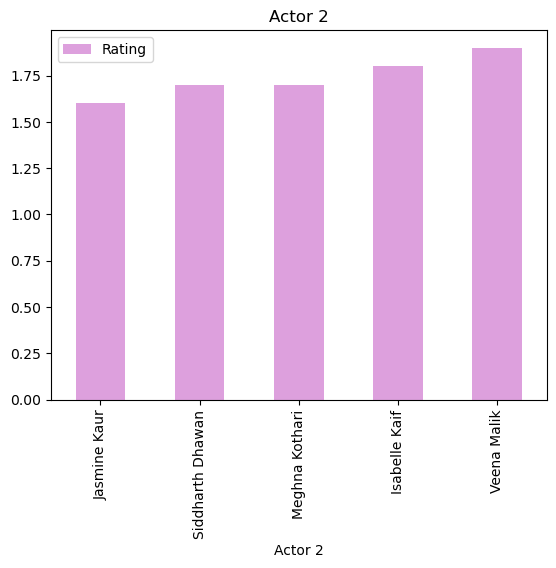

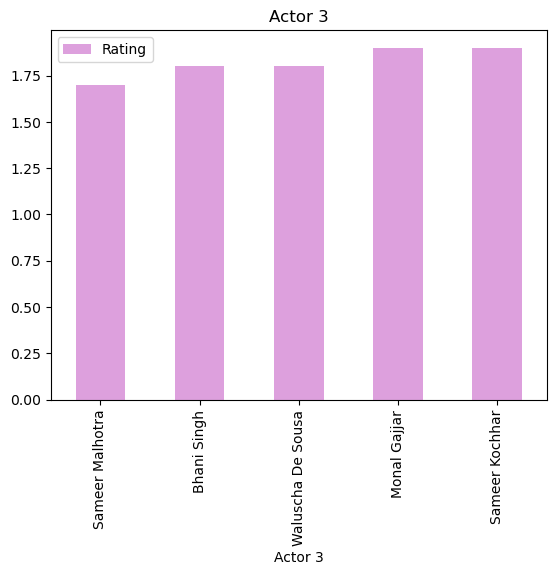

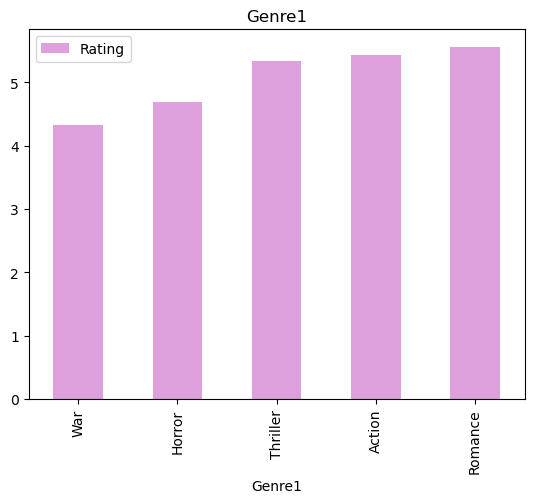

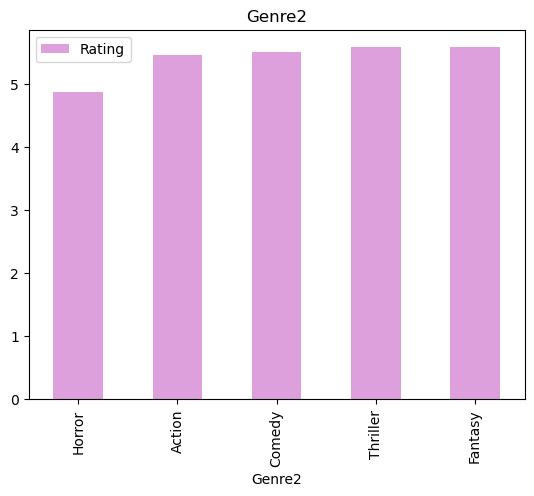

In [120]:
for i in df_cat.columns:
    df2.groupby(i)[['Rating']].mean().sort_values(by='Rating', ascending=True).head().plot(kind='bar', color='plum')
    plt.title(i)

<Axes: >

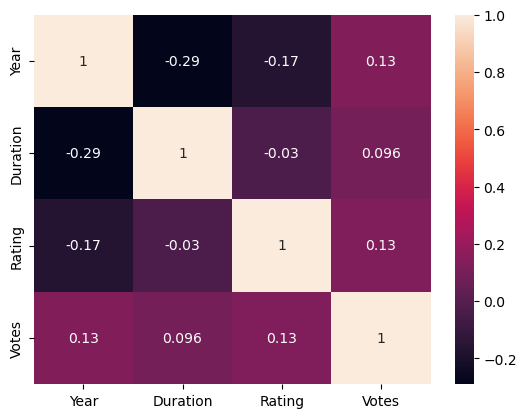

In [128]:
sns.heatmap(df2.corr(), annot=True)

### EDA analysis points to be noted

##### univariate analysis 
More than 200 films are released in 2005 followed by 1500 films in 2000\

Most of the films in the data set has the duration between 100 minutes and 200 minutes and 	it speaks around 120 minutes
The highest rating is between 6 and 7

In the given data set more than 50 films are directed by Mahesh Bhatt followed by David Dhawan who directed 45 films\

In the given data set actor 1 or lead actor who appears more than 200 times is Jitendra followed by Dharmendra who appears more than in 100 films\

The highest appearing lead actor 2 in the data set is Rekha and lead actor 3 is Pran.\

In genre 1 drama peaks with 2500 films followed by action films and comedy.\

Considering the generate to most of the films I didn't have any second categorywhich is filled by not available which peaks the most more than 2500 times in the dataset. 


##### bivariate analysis
Non linear relationship between any numerical can be found

From the data movies of the director  Ali Sayeed is top rated. 

The movies of Ahana Shah(actor1) is highly rated 

Considering from the lead actor to the movies of Mahesh Narayanan is highly rated

From the perspective of actor 3 Rajashree rajkummar is films are highly rated

In genre 1 the highly rated category is documentary and in genre 2 the highly rated categories biography

From the data the movies of Pramod Mandloi is low rated

The movies of Kamal Rashid Khan as lead actor shows low  writing

Lead actor 2 as Jasmine kaur shows shows low rating

Lead actor 3 Sameer Malhotra shows low rating

The movie category war has below rating

The movie category horror as genre 2 has below rating

No strong correlation between any of the varaibles seen. 

## Treating outliers

In [44]:
df2.describe()

,Year,Duration,Rating,Votes
count,7919.000000,7919.000000,7919.000000,7919.000000
mean,1993.321758,132.739866,5.841621,1938.520394
std,20.463770,22.838302,1.381777,11602.415952
min,1917.000000,21.000000,1.100000,5.000000
25%,1979.500000,124.000000,4.900000,16.000000
50%,1997.000000,134.000000,6.000000,55.000000
75%,2011.000000,143.000000,6.800000,404.000000
max,2021.000000,321.000000,10.000000,591417.000000


Potential outliers in Votes

<Axes: >

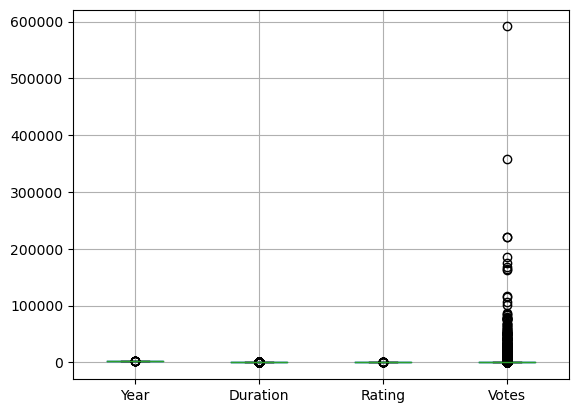

In [45]:
df2.boxplot()

In [55]:
q1=df2['Votes'].quantile(0.25)
q3=df2['Votes'].quantile(0.75)


iqr=q3-q1


ul=q3+((1.25)*(iqr))
ll=q1-((1.25)*(iqr))

df3=df2[~( (df2['Votes']<ll) | (df2['Votes']>ul))]

In [56]:
df3

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2
1,2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Not available
3,2019.0,110.0,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance
5,1997.0,147.0,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama
8,2012.0,82.0,5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery
9,2014.0,116.0,4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,Action,Crime
...,...,...,...,...,...,...,...,...,...,...
15501,1992.0,134.0,5.3,135.0,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,Action,Crime
15503,1989.0,125.0,5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action,Crime
15504,1988.0,134.0,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,Not available
15505,1999.0,129.0,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama


# Modelling 

In [57]:
# IMPORT THE LIBRARIES 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV ,RandomizedSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [59]:
# define independent and dependent variables 
x=df3.drop('Rating', axis=1)
y=df3["Rating"]

# split the data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [64]:
# label encode the categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for i in ['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre1', 'Genre2']:
    xtrain[i]= label_encoder.fit_transform(xtrain[i])

# Apply label encoding to each categorical column
for i in ['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre1', 'Genre2']:
      xtest[i]= label_encoder.fit_transform(xtest[i])


In [66]:
xtrain

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2
7793,1993.0,173.0,25.0,1384,267,277,1390,14,17
820,1979.0,144.0,161.0,722,761,1435,775,1,5
9638,2014.0,100.0,192.0,695,789,2080,2183,7,9
3855,2017.0,130.0,103.0,1288,643,1332,378,15,13
7807,2002.0,165.0,270.0,2336,704,50,1755,13,14
...,...,...,...,...,...,...,...,...,...
2708,1985.0,137.0,8.0,1779,1832,1008,1116,0,13
8007,1979.0,134.0,6.0,2093,72,340,2007,0,1
3092,1974.0,134.0,23.0,1468,1892,894,2119,5,5
10910,1990.0,127.0,141.0,559,1891,709,704,5,17


In [67]:
xtest

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2
6135,1991.0,143.0,342.0,271,323,420,328,0,5
14509,2011.0,134.0,10.0,684,692,342,650,7,12
6423,1961.0,134.0,11.0,297,399,469,568,0,8
4078,2017.0,106.0,325.0,535,15,242,368,11,12
2164,2020.0,131.0,287.0,749,638,586,702,4,5
...,...,...,...,...,...,...,...,...,...
11134,1986.0,153.0,830.0,320,261,574,595,4,5
1279,1957.0,134.0,9.0,161,397,655,714,7,17
15405,1993.0,168.0,582.0,412,306,349,335,4,5
10163,1986.0,123.0,173.0,638,580,649,478,7,12


# 1. Linear Regression 

In [124]:
# Train a model on the encoded data
model = LinearRegression()
model.fit(xtrain, ytrain)

# Make predictions on the training set
y_train_pred = model.predict(xtrain)

# Make predictions on the testing set
y_test_pred = model.predict(xtest)

# Evaluate the model
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)
train_r2 = r2_score(ytrain, y_train_pred)
test_r2 = r2_score(ytest, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")


Train RMSE: 1.2993738139251814
Test RMSE: 1.3024637082745365
Train R2: 0.08750749172245698
Test R2: 0.08496606862644751


In [125]:
# appending the scores to a dataframe called  D for the final analysis 
D=pd.DataFrame()
D['SCORE']=['rmse train', 'rmse test', 'r2 train','r2 test']
D['LINEAR REGRESSION']=[mean_squared_error(ytrain, y_train_pred, squared=False),
                        mean_squared_error(ytest, y_test_pred, squared=False),
                       r2_score(ytrain, y_train_pred),
                        r2_score(ytest, y_test_pred)]

In [126]:
D

,SCORE,LINEAR REGRESSION
0,rmse train,1.299374
1,rmse test,1.302464
2,r2 train,0.087507
3,r2 test,0.084966


# 2.RIDGE

In [79]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()


ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 100} 



In [81]:
# use Ridge() to perform ridge regression

ridge_model = Ridge(alpha = 100, max_iter = 500)

# fit the model on train set
ridge_model.fit(xtrain, ytrain)


Ridge(alpha=100, max_iter=500)

In [84]:
# get predicted values

ypred_train_ridge = ridge_model.predict(xtrain)
ypred_test_ridge = ridge_model.predict(xtest)


In [85]:
print("RMSE Train lr_ridge:",mean_squared_error(ytrain,ypred_train_ridge,squared=False))
print("RMSE Test lr_ridge:",mean_squared_error(ytest,ypred_test_ridge,squared=False))



r2_train_ridge=r2_score(ytrain,ypred_train_ridge)
r2_test_ridge=r2_score(ytest,ypred_test_ridge)

print("R2 Train ridge2:", r2_train_ridge)
print("R2 Test ridge2:" ,r2_test_ridge)


RMSE Train lr_ridge: 1.2990350919783313
RMSE Test lr_ridge: 1.3009327493725527
R2 Train ridge2: 0.08798316846734555
R2 Test ridge2: 0.08711592664400747


In [87]:

D['ridge']=[mean_squared_error(ytrain,ypred_train_ridge,squared=False),
                                   mean_squared_error(ytest,ypred_test_ridge,squared=False),
                        r2_train_ridge,r2_test_ridge]

# 3. LASSO

In [89]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the LASSO regression model
lasso = Lasso()


lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for Ridge Regression: ', lasso_grid.best_params_, '\n')


Best parameters for Ridge Regression:  {'alpha': 1e-15} 



In [90]:
lasso_model = Lasso(alpha = 1e-15, max_iter = 500)

In [91]:
# fit the model 
lasso_model.fit(xtrain, ytrain)

Lasso(alpha=1e-15, max_iter=500)

In [93]:
# get the predicted values
ypred_train_LASSO = lasso_model.predict(xtrain)
ypred_test_LASSO = lasso_model.predict(xtest)

In [94]:
# get rmse and r2 score 
print("RMSE Train lasso:",mean_squared_error(ytrain,ypred_train_LASSO ,squared=False))
print("RMSE Test lasso:",mean_squared_error(ytest,ypred_test_LASSO ,squared=False))
r2_train_lasso=r2_score(ytrain,ypred_train_LASSO)
r2_test_lasso=r2_score(ytest,ypred_test_LASSO)
print("R2 Train :", r2_train_lasso)
print("R2 Test:" ,r2_test_lasso)

RMSE Train lasso: 1.2990350891759013
RMSE Test lasso: 1.3009259926301624
R2 Train : 0.08798317240236375
R2 Test: 0.08712540923486534


In [95]:
D[' lasso']=[mean_squared_error(ytrain,ypred_train_LASSO ,squared=False),
                                   mean_squared_error(ytest,ypred_test_LASSO ,squared=False),
                        r2_train_lasso,r2_test_lasso]

# FEATURE SELECTION AND REBUILDING THE MODEL

### forward feature selection

In [96]:
lr= LinearRegression()

lr_forward = sfs(estimator=lr, k_features ='best', forward=True,
                     verbose=2, scoring='r2')


sfs_forward = lr_forward.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-11-26 12:13:32] Features: 1/9 -- score: 0.04849098498125863[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-11-26 12:13:33] Features: 2/9 -- score: 0.07466897467513109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-11-26 12:13:33] Features: 3/9 -- score: 0.07901209697456502[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [97]:
sfs_forward.k_feature_names_

('Year', 'Duration', 'Votes', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre1')

In [98]:
xtrain=xtrain.loc[:,sfs_forward.k_feature_names_]

In [99]:
xtest=xtest.loc[:,sfs_forward.k_feature_names_]

In [100]:
lr_model_sfs = lr.fit(xtrain,ytrain)
ypred_train_lr_sfs = lr_model_sfs.predict(xtrain)
ypred_test_lr_sfs = lr_model_sfs.predict(xtest)
print("RMSE Train lr sfs:",mean_squared_error(ytrain,ypred_train_lr_sfs,squared=False))
print("RMSE Test lr sfs:",mean_squared_error(ytest,ypred_test_lr_sfs,squared=False))


r2_train_lr_sfs=r2_score(ytrain,ypred_train_lr_sfs)
r2_test_lr_sfs=r2_score(ytest,ypred_test_lr_sfs)
print("R2 Train_sfs :", r2_train_lr_sfs)
print("R2 Test_sfs:" ,r2_test_lr_sfs)

RMSE Train lr sfs: 1.2993738139251814
RMSE Test lr sfs: 1.3024637082745365
R2 Train_sfs : 0.08750749172245698
R2 Test_sfs: 0.08496606862644751


In [101]:
D['SFS_FW']=[mean_squared_error(ytrain,ypred_train_lr_sfs,squared=False),
                                   mean_squared_error(ytest,ypred_test_lr_sfs,squared=False),
                       r2_train_lr_sfs,r2_test_lr_sfs]

# RandomForestRegressor

In [102]:
rfg = RandomForestRegressor(random_state=1000)
rfg.fit(xtrain,ytrain)

RandomForestRegressor(random_state=1000)

In [103]:
rf_pred_train = rfg.predict(xtrain)
rf_pred_test = rfg.predict(xtest)

In [111]:
print("RMSE Train lr sfs:",mean_squared_error(ytrain,rf_pred_train,squared=False))
print("RMSE Test lr sfs:",mean_squared_error(ytest,rf_pred_test,squared=False))


r2_train_rf=r2_score(ytrain,rf_pred_train)
r2_test_rf=r2_score(ytest,rf_pred_test)
print("R2 Train_sfs :", r2_train_rf)
print("R2 Test_sfs:" ,r2_test_rf)

RMSE Train lr sfs: 0.4260722708184001
RMSE Test lr sfs: 1.188898490154672
R2 Train_sfs : 0.9018867575185323
R2 Test_sfs: 0.23757787992398038


In [120]:
D['randomforest']=[mean_squared_error(ytrain,rf_pred_train,squared=False),
                                   mean_squared_error(ytest,rf_pred_test,squared=False),
                       r2_train_rf,r2_test_rf]

In [121]:
D

,SCORE,LINEAR REGRESSION,ridge,lasso,SFS_FW,randomforest
0,rmse train,1.299035,1.299035,1.299035,1.299374,0.426072
1,rmse test,1.300926,1.300933,1.300926,1.302464,1.188898
2,r2 train,0.087983,0.087983,0.087983,0.087507,0.901887
3,r2 test,0.087125,0.087116,0.087125,0.084966,0.237578


# XGBRegressor

In [106]:
from xgboost import XGBRegressor

In [107]:
# Create and train the XGBoost Regressor model
xgboost = XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost.fit(xtrain, ytrain)
y_pred_xgboost_train = xgboost.predict(xtrain)
y_pred_xgboost_test = xgboost.predict(xtest)

In [117]:
print("RMSE Train lr sfs:",mean_squared_error(ytrain,y_pred_xgboost_train ,squared=False))
print("RMSE Test lr sfs:",mean_squared_error(ytest,y_pred_xgboost_test,squared=False))
r2_train_xgb=r2_score(ytrain,y_pred_xgboost_train )
r2_test_xgb=r2_score(ytest,y_pred_xgboost_test)
print("R2 Train_sfs :", r2_train_xgb)
print("R2 Test_sfs:" ,r2_test_xgb)

RMSE Train lr sfs: 0.5005906780523195
RMSE Test lr sfs: 1.2348853448223127
R2 Train_sfs : 0.8645663438034251
R2 Test_sfs: 0.1774558648644866


In [122]:
D['XGBOOST']=[mean_squared_error(ytrain,y_pred_xgboost_train,squared=False),
                                   mean_squared_error(ytest,y_pred_xgboost_test,squared=False),
                       r2_train_xgb,r2_test_xgb]

In [123]:
D

,SCORE,LINEAR REGRESSION,ridge,lasso,SFS_FW,randomforest,XGBOOST
0,rmse train,1.299035,1.299035,1.299035,1.299374,0.426072,0.500591
1,rmse test,1.300926,1.300933,1.300926,1.302464,1.188898,1.234885
2,r2 train,0.087983,0.087983,0.087983,0.087507,0.901887,0.864566
3,r2 test,0.087125,0.087116,0.087125,0.084966,0.237578,0.177456


# XGBOOST MODEL

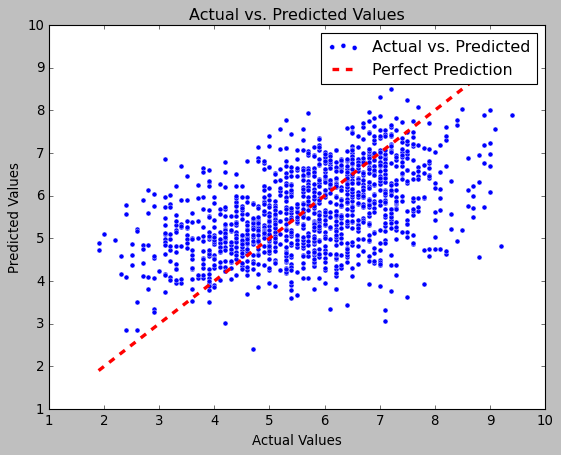

In [135]:
plt.style.use('classic')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ytest,
            y=y_pred_xgboost_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red', linewidth=3, 
         label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### thankyou